# Exploring Boston Weather Data

We are presented with a messy, real-world dataset containing an entire year's worth of weather data from Boston, USA. Among other things, we'll be presented with variables that contain column names, column names that should be values, numbers coded as character strings, and values that are missing, extreme, and downright erroneous!

# Get a feel for the data

Before diving into our data cleaning routine, we must first understand the basic structure of the data. This involves looking at things like the `class()` of the data object to make sure it's what we expect (generally a `data.frame`) in addition to checking its dimensions with `dim()` and the column names with `names()`.

In [1]:
weather = readRDS(gzcon(url('https://assets.datacamp.com/production/repositories/34/datasets/b3c1036d9a60a9dfe0f99051d2474a54f76055ea/weather.rds')))

# Libraries

In [9]:
library(readr)
library(dplyr)
library(lubridate)
library(stringr)
library(installr)
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

In [2]:
# Verify that weather is a data.frame
class(weather)

# Check the dimensions
dim(weather)

# View the column names
names(weather)

[1] "data.frame"

[1] 286  35

[1] "X"       "year"    "month"   "measure" "X1"      "X2"      "X3"     
 [8] "X4"      "X5"      "X6"      "X7"      "X8"      "X9"      "X10"    
[15] "X11"     "X12"     "X13"     "X14"     "X15"     "X16"     "X17"    
[22] "X18"     "X19"     "X20"     "X21"     "X22"     "X23"     "X24"    
[29] "X25"     "X26"     "X27"     "X28"     "X29"     "X30"     "X31"

We've confirmed that the object is a data frame with 286 rows and 35 columns. 

# Summarize the data

Next up is to look at some summaries of the data. This is where functions like `str()`, `glimpse()` from dplyr, and `summary()` come in handy.

In [6]:
# View the structure of the data
str(weather)

# Look at the structure using dplyr's glimpse()
glimpse(weather)

# View a summary of the data
summary(weather)

'data.frame':	286 obs. of  35 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ year   : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ month  : int  12 12 12 12 12 12 12 12 12 12 ...
 $ measure: chr  "Max.TemperatureF" "Mean.TemperatureF" "Min.TemperatureF" "Max.Dew.PointF" ...
 $ X1     : chr  "64" "52" "39" "46" ...
 $ X2     : chr  "42" "38" "33" "40" ...
 $ X3     : chr  "51" "44" "37" "49" ...
 $ X4     : chr  "43" "37" "30" "24" ...
 $ X5     : chr  "42" "34" "26" "37" ...
 $ X6     : chr  "45" "42" "38" "45" ...
 $ X7     : chr  "38" "30" "21" "36" ...
 $ X8     : chr  "29" "24" "18" "28" ...
 $ X9     : chr  "49" "39" "29" "49" ...
 $ X10    : chr  "48" "43" "38" "45" ...
 $ X11    : chr  "39" "36" "32" "37" ...
 $ X12    : chr  "39" "35" "31" "28" ...
 $ X13    : chr  "42" "37" "32" "28" ...
 $ X14    : chr  "45" "39" "33" "29" ...
 $ X15    : chr  "42" "37" "32" "33" ...
 $ X16    : chr  "44" "40" "35" "42" ...
 $ X17    : chr  "49" "45" "41" "46" ...
 $

       X               year          month          measure         
 Min.   :  1.00   Min.   :2014   Min.   : 1.000   Length:286        
 1st Qu.: 72.25   1st Qu.:2015   1st Qu.: 4.000   Class :character  
 Median :143.50   Median :2015   Median : 7.000   Mode  :character  
 Mean   :143.50   Mean   :2015   Mean   : 6.923                     
 3rd Qu.:214.75   3rd Qu.:2015   3rd Qu.:10.000                     
 Max.   :286.00   Max.   :2015   Max.   :12.000                     
      X1                 X2                 X3                 X4           
 Length:286         Length:286         Length:286         Length:286        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

Now that we have a pretty good feel for how the table is structured, we'll take a look at some real observations!

# Take a closer look

After understanding the structure of the data and looking at some brief summaries, it often helps to preview the actual data. The functions `head()` and `tail()` allow us to view the top and bottom rows of the data, respectively. 

In [7]:
# View first 6 rows
head(weather)

# View first 15 rows
head(weather, n=15)

# View the last 6 rows
tail(weather)

# View the last 10 rows
tail(weather, n=10)

X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52,52,41,30,30
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45,46,36,26,25
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38,40,30,22,20
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34,42,26,10,8
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31,35,20,4,5
6,2014,12,Min.DewpointF,26,17,24,13,12,36,...,25,37,41,29,28,29,27,10,-6,1


X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52,52,41,30,30
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45,46,36,26,25
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38,40,30,22,20
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34,42,26,10,8
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31,35,20,4,5
6,2014,12,Min.DewpointF,26,17,24,13,12,36,...,25,37,41,29,28,29,27,10,-6,1
7,2014,12,Max.Humidity,74,92,100,69,85,100,...,89,100,100,100,70,70,76,64,50,57
8,2014,12,Mean.Humidity,63,72,79,54,66,93,...,79,91,98,75,60,60,65,51,38,44
9,2014,12,Min.Humidity,52,51,57,39,47,85,...,69,82,96,49,49,50,53,37,26,31
10,2014,12,Max.Sea.Level.PressureIn,30.45,30.71,30.4,30.56,30.68,30.42,...,30.4,30.31,30.13,29.96,30.16,30.22,29.99,30.22,30.36,30.32


,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
281,281,2015,12,Mean.Wind.SpeedMPH,6,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
282,282,2015,12,Max.Gust.SpeedMPH,17,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
283,283,2015,12,PrecipitationIn,0.14,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
284,284,2015,12,CloudCover,7,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
285,285,2015,12,Events,Rain,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
286,286,2015,12,WindDirDegrees,109,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
277,277,2015,12,Max.VisibilityMiles,10,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
278,278,2015,12,Mean.VisibilityMiles,8,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
279,279,2015,12,Min.VisibilityMiles,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
280,280,2015,12,Max.Wind.SpeedMPH,15,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
281,281,2015,12,Mean.Wind.SpeedMPH,6,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
282,282,2015,12,Max.Gust.SpeedMPH,17,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
283,283,2015,12,PrecipitationIn,0.14,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
284,284,2015,12,CloudCover,7,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
285,285,2015,12,Events,Rain,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
286,286,2015,12,WindDirDegrees,109,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Let's tidy the data

## Column names are values

The `weather` dataset suffers from one of the five most common symptoms of messy data: column names are values. In particular, the column names `X1-X31` represent days of the month, which should really be values of a new variable called `day`.

The tidyr package provides the `gather()` function for exactly this scenario.
```python
gather(df, time, val, t1:t3)
```
>`gather()` allows us to select multiple columns to be gathered by using the `:` operator.

In [10]:
# Gather the columns
weather2 <- gather(weather, day, value, X1:X31, na.rm = TRUE)

# View the head
head(weather2)

X,year,month,measure,day,value
1,2014,12,Max.TemperatureF,X1,64
2,2014,12,Mean.TemperatureF,X1,52
3,2014,12,Min.TemperatureF,X1,39
4,2014,12,Max.Dew.PointF,X1,46
5,2014,12,MeanDew.PointF,X1,40
6,2014,12,Min.DewpointF,X1,26


## Values are variable names

Our data suffer from a second common symptom of messy data: values are variable names. Specifically, values in the `measure` column should be variables (i.e. column names) in our dataset.

The `spread()` function from tidyr is designed to help with this.
```python

spread(df2, time, val)
```


In [11]:
# First remove column of row names
without_x <- weather2[, -1]

# Spread the data
weather3 <- spread(without_x, measure, value)

# View the head
head(weather3)

year,month,day,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
2014,12,X1,6,Rain,46,29,74,30.45,64,...,10,13,40,26,52,30.01,39,10,0.01,268
2014,12,X10,8,Rain,45,29,100,29.58,48,...,3,13,39,37,89,29.43,38,1,0.28,357
2014,12,X11,8,Rain-Snow,37,28,92,29.81,39,...,7,13,31,27,82,29.44,32,1,0.02,230
2014,12,X12,7,Snow,28,21,85,29.88,39,...,10,11,27,25,64,29.81,31,7,T,286
2014,12,X13,5,,28,23,75,29.86,42,...,10,12,26,24,55,29.78,32,10,T,298
2014,12,X14,4,,29,20,82,29.91,45,...,10,10,27,25,53,29.78,33,10,0.00,306


This dataset is looking much better already!

# Prepare the data for analysis

## Clean up dates

Now that the weather dataset adheres to tidy data principles, the next step is to prepare it for analysis. We'll start by combining the `year`, `month`, and `day` columns and recoding the resulting character column as a `date`. We can use a combination of base R, stringr, and lubridate to accomplish this task.

In [12]:
# Remove X's from day column
weather3$day <- str_replace(weather3$day, 'X', '')

# Unite the year, month, and day columns
weather4 <- unite(weather3, date, year, month, day, sep = "-")

# Convert date column to proper date format using lubridates's ymd()
weather4$date <- ymd(weather4$date)

# Rearrange columns using dplyr's select()
weather5 <- select(weather4, date, Events, CloudCover:WindDirDegrees)

# View the head of weather5
head(weather5)


date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
2014-12-01,Rain,6,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-10,Rain,8,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357
2014-12-11,Rain-Snow,8,37,28,92,29.81,39,10,21,...,7,13,31,27,82,29.44,32,1,0.02,230
2014-12-12,Snow,7,28,21,85,29.88,39,10,16,...,10,11,27,25,64,29.81,31,7,T,286
2014-12-13,,5,28,23,75,29.86,42,10,17,...,10,12,26,24,55,29.78,32,10,T,298
2014-12-14,,4,29,20,82,29.91,45,10,15,...,10,10,27,25,53,29.78,33,10,0.00,306


## A closer look at column types

It's important for analysis that variables are coded appropriately. This is not yet the case with our weather data. 

In [13]:
# View the structure of weather5
str(weather5)

# Examine the first 20 rows of weather5. Are most of the characters numeric?
head(weather5, 20)

# See what happens if we try to convert PrecipitationIn to numeric
as.numeric(weather5$PrecipitationIn)

'data.frame':	366 obs. of  23 variables:
 $ date                     : Date, format: "2014-12-01" "2014-12-10" ...
 $ Events                   : chr  "Rain" "Rain" "Rain-Snow" "Snow" ...
 $ CloudCover               : chr  "6" "8" "8" "7" ...
 $ Max.Dew.PointF           : chr  "46" "45" "37" "28" ...
 $ Max.Gust.SpeedMPH        : chr  "29" "29" "28" "21" ...
 $ Max.Humidity             : chr  "74" "100" "92" "85" ...
 $ Max.Sea.Level.PressureIn : chr  "30.45" "29.58" "29.81" "29.88" ...
 $ Max.TemperatureF         : chr  "64" "48" "39" "39" ...
 $ Max.VisibilityMiles      : chr  "10" "10" "10" "10" ...
 $ Max.Wind.SpeedMPH        : chr  "22" "23" "21" "16" ...
 $ Mean.Humidity            : chr  "63" "95" "87" "75" ...
 $ Mean.Sea.Level.PressureIn: chr  "30.13" "29.5" "29.61" "29.85" ...
 $ Mean.TemperatureF        : chr  "52" "43" "36" "35" ...
 $ Mean.VisibilityMiles     : chr  "10" "3" "7" "10" ...
 $ Mean.Wind.SpeedMPH       : chr  "13" "13" "13" "11" ...
 $ MeanDew.PointF           

date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
2014-12-01,Rain,6,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-10,Rain,8,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357
2014-12-11,Rain-Snow,8,37,28,92,29.81,39,10,21,...,7,13,31,27,82,29.44,32,1,0.02,230
2014-12-12,Snow,7,28,21,85,29.88,39,10,16,...,10,11,27,25,64,29.81,31,7,T,286
2014-12-13,,5,28,23,75,29.86,42,10,17,...,10,12,26,24,55,29.78,32,10,T,298
2014-12-14,,4,29,20,82,29.91,45,10,15,...,10,10,27,25,53,29.78,33,10,0.00,306
2014-12-15,,2,33,21,89,30.15,42,10,15,...,10,6,29,27,60,29.91,32,10,0.00,324
2014-12-16,Rain,8,42,10,96,30.17,44,10,8,...,9,4,36,30,73,29.92,35,5,T,79
2014-12-17,Rain,8,46,26,100,29.91,49,10,20,...,6,11,41,32,70,29.69,41,1,0.43,311
2014-12-18,Rain,7,34,30,89,29.87,44,10,23,...,10,14,30,26,57,29.71,36,10,0.01,281


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] 0.01 0.28 0.02   NA   NA 0.00 0.00   NA 0.43 0.01 0.00 0.10   NA   NA 0.05
 [16] 0.25 0.56 0.14 0.00 0.00 0.01 0.00 0.44 0.00 0.00 0.00 0.11 1.09 0.13 0.03
 [31] 2.90 0.00 0.00 0.00 0.20 0.00   NA 0.12 0.00 0.00 0.15 0.00 0.00 0.00 0.00
 [46]   NA 0.00 0.71 0.00 0.10 0.95 0.01   NA 0.62 0.06 0.05 0.57 0.00 0.02   NA
 [61] 0.00 0.01 0.00 0.05 0.01 0.03 0.00 0.23 0.39 0.00 0.02 0.01 0.06 0.78 0.00
 [76] 0.17 0.11 0.00   NA 0.07 0.02 0.00 0.00 0.00 0.00 0.09   NA 0.07 0.37 0.88
 [91] 0.17 0.06 0.01 0.00 0.00 0.80 0.27 0.00 0.14 0.00 0.00 0.01 0.05 0.09 0.00
[106] 0.00 0.00 0.04 0.80 0.21 0.12 0.00 0.26   NA 0.00 0.02   NA 0.00 0.00   NA
[121] 0.00 0.00 0.09 0.00 0.00 0.00 0.01 0.00 0.00 0.06 0.00 0.00 0.00 0.61 0.54
[136]   NA 0.00   NA 0.00 0.00 0.10 0.07 0.00 0.03 0.00 0.39 0.00 0.00 0.03 0.26
[151] 0.09 0.00 0.00 0.00 0.02 0.00 0.00 0.00   NA 0.00 0.00 0.27 0.00 0.00 0.00
[166]   NA 0.00 0.00   NA 0.00 0.00   NA 0.00 0.00 0.00 0.91 0.00 0.02 0.00 0.00
[181] 0.00 0.00 0.38 0.00 0.00 0.00   NA 0.00 0.40   NA 0.00 0.00 0.00 0.74 0.04
[196] 1.72 0.00 0.01 0.00 0.00   NA 0.20 1.43   NA 0.00 0.00 0.00   NA 0.09 0.00
[211]   NA   NA 0.50 1.12 0.00 0.00 0.00 0.03   NA 0.00   NA 0.14   NA 0.00   NA
[226]   NA 0.00 0.00 0.01 0.00   NA 0.06 0.00 0.00 0.00 0.02 0.00   NA 0.00 0.00
[241] 0.02   NA 0.15   NA 0.00 0.83 0.00 0.00 0.00 0.08 0.00 0.00 0.14 0.00 0.00
[256] 0.00 0.63   NA 0.02   NA 0.00   NA 0.00 0.00 0.00 0.00 0.00 0.00 0.49 0.00
[271] 0.00 0.00 0.00 0.00 0.00 0.17 0.66 0.01 0.38 0.00 0.00 0.00 0.00 0.00 0.00
[286] 0.00   NA 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.04 0.01 2.46   NA 0.00
[301] 0.00 0.00 0.20 0.00   NA 0.00 0.00 0.00 0.12 0.00 0.00   NA   NA   NA 0.00
[316] 0.08   NA 0.07   NA 0.00 0.00 0.03 0.00 0.00 0.36 0.73 0.01 0.00 0.00 0.00
[331] 0.00 0.00 0.00 0.00 0.34   NA 0.07 0.54 0.04 0.01 0.00 0.00 0.00 0.00 0.00
[346]   NA 0.00 0.86 0.00 0.30 0.04 0.00 0.00 0.00 0.00 0.21 0.00 0.00 0.00 0.00
[361] 0.00 0.00 0.00 0.00 0.00 0.14

## Column type conversions

`"T"` was used to denote a trace amount (i.e. too small to be accurately measured) of precipitation in the `PrecipitationIn` column. In order to coerce this column to numeric, wwe'll need to deal with this somehow. To keep things simple, we will just replace `"T"` with zero, as a string (`"0"`).

In [14]:
# Replace "T" with "0" (T = trace)
weather5$PrecipitationIn <- str_replace(weather5$PrecipitationIn, "T", "0")

# Convert characters to numerics
weather6 <- mutate_at(weather5, vars(CloudCover:WindDirDegrees), funs(as.numeric))

# Look at result
str(weather6)

Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

'data.frame':	366 obs. of  23 variables:
 $ date                     : Date, format: "2014-12-01" "2014-12-10" ...
 $ Events                   : chr  "Rain" "Rain" "Rain-Snow" "Snow" ...
 $ CloudCover               : num  6 8 8 7 5 4 2 8 8 7 ...
 $ Max.Dew.PointF           : num  46 45 37 28 28 29 33 42 46 34 ...
 $ Max.Gust.SpeedMPH        : num  29 29 28 21 23 20 21 10 26 30 ...
 $ Max.Humidity             : num  74 100 92 85 75 82 89 96 100 89 ...
 $ Max.Sea.Level.PressureIn : num  30.4 29.6 29.8 29.9 29.9 ...
 $ Max.TemperatureF         : num  64 48 39 39 42 45 42 44 49 44 ...
 $ Max.VisibilityMiles      : num  10 10 10 10 10 10 10 10 10 10 ...
 $ Max.Wind.SpeedMPH        : num  22 23 21 16 17 15 15 8 20 23 ...
 $ Mean.Humidity            : num  63 95 87 75 65 68 75 85 85 73 ...
 $ Mean.Sea.Level.PressureIn: num  30.1 29.5 29.6 29.9 29.8 ...
 $ Mean.TemperatureF        : num  52 43 36 35 37 39 37 40 45 40 ...
 $ Mean.VisibilityMiles     : num  10 3 7 10 10 10 10 9 6 10 ...
 $ Mean.

It looks like our data are finally in the correct formats and organized in a logical manner! Now that our data are in the right form, we can begin the analysis.

# Missing, extreme, and unexpected values

## Find missing values

Before dealing with missing values in the data, it's important to find them and figure out why they exist in the first place. 

> If the dataset is too big to look at all at once, like it is here, we will use `sum()` and `is.na()` to quickly size up the situation by counting the number of NA values.

The `summary()` function also come in handy for identifying which variables contain the missing values. Finally, the `which()` function is useful for locating the missing values within a particular column.

In [15]:
# Count missing values
sum(is.na(weather6))

# Find missing values
summary(weather6)

# Find indices of NAs in Max.Gust.SpeedMPH
ind <- which(is.na(weather6$Max.Gust.SpeedMPH))

# Look at the full rows for records missing Max.Gust.SpeedMPH
weather6[ind, ]

[1] 6

      date               Events            CloudCover    Max.Dew.PointF 
 Min.   :2014-12-01   Length:366         Min.   :0.000   Min.   :-6.00  
 1st Qu.:2015-03-02   Class :character   1st Qu.:3.000   1st Qu.:32.00  
 Median :2015-06-01   Mode  :character   Median :5.000   Median :47.50  
 Mean   :2015-06-01                      Mean   :4.708   Mean   :45.48  
 3rd Qu.:2015-08-31                      3rd Qu.:7.000   3rd Qu.:61.00  
 Max.   :2015-12-01                      Max.   :8.000   Max.   :75.00  
                                                                        
 Max.Gust.SpeedMPH  Max.Humidity     Max.Sea.Level.PressureIn Max.TemperatureF
 Min.   : 0.00     Min.   :  39.00   Min.   :29.58            Min.   :18.00   
 1st Qu.:21.00     1st Qu.:  73.25   1st Qu.:30.00            1st Qu.:42.00   
 Median :25.50     Median :  86.00   Median :30.14            Median :60.00   
 Mean   :26.99     Mean   :  85.69   Mean   :30.16            Mean   :58.93   
 3rd Qu.:31.25     3r

,date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
161,2015-05-18,Fog,6,52,NA,100,30.30,58,10,16,...,8,10,48,43,57,30.12,49,0,0,72
205,2015-06-03,,7,48,NA,93,30.31,56,10,14,...,10,7,45,43,71,30.19,47,10,0,90
273,2015-08-08,,4,61,NA,87,30.02,76,10,14,...,10,6,57,54,49,29.95,61,10,0,45
275,2015-09-01,,1,63,NA,78,30.06,79,10,15,...,10,9,62,59,52,29.96,69,10,0,54
308,2015-10-12,,0,56,NA,89,29.86,76,10,15,...,10,8,51,48,41,29.74,51,10,0,199
358,2015-11-03,,1,44,NA,82,30.25,73,10,16,...,10,8,42,40,31,30.06,47,10,0,281


In this situation it's unclear why these values are missing and there doesn't appear to be any obvious pattern to their missingness, so we'll leave them alone for now.

## An obvious error

Besides missing values, we want to know if there are values in the data that are too extreme or bizarre to be plausible. A great way to start the search for these values is with `summary()`.

Once implausible values are identified, they must be dealt with in an intelligent and informed way. 

> Sometimes the best way forward is obvious and other times it may require some research and/or discussions with the original collectors of the data.

In [16]:
# Review distributions for all variables
summary(weather6)

# Find row with Max.Humidity of 1000
ind <- which(weather6$Max.Humidity==1000)

# Look at the data for that day
weather6[ind, ]

# Change 1000 to 100
weather6$Max.Humidity[ind] <- 100

      date               Events            CloudCover    Max.Dew.PointF 
 Min.   :2014-12-01   Length:366         Min.   :0.000   Min.   :-6.00  
 1st Qu.:2015-03-02   Class :character   1st Qu.:3.000   1st Qu.:32.00  
 Median :2015-06-01   Mode  :character   Median :5.000   Median :47.50  
 Mean   :2015-06-01                      Mean   :4.708   Mean   :45.48  
 3rd Qu.:2015-08-31                      3rd Qu.:7.000   3rd Qu.:61.00  
 Max.   :2015-12-01                      Max.   :8.000   Max.   :75.00  
                                                                        
 Max.Gust.SpeedMPH  Max.Humidity     Max.Sea.Level.PressureIn Max.TemperatureF
 Min.   : 0.00     Min.   :  39.00   Min.   :29.58            Min.   :18.00   
 1st Qu.:21.00     1st Qu.:  73.25   1st Qu.:30.00            1st Qu.:42.00   
 Median :25.50     Median :  86.00   Median :30.14            Median :60.00   
 Mean   :26.99     Mean   :  85.69   Mean   :30.16            Mean   :58.93   
 3rd Qu.:31.25     3r

,date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
135,2015-04-21,Fog-Rain-Thunderstorm,6,57,94,1000,29.75,65,10,20,...,5,10,49,36,42,29.53,46,0,0.54,184


Once you find obvious errors, it's not too hard to fix them if you know which values they should take.

## Another obvious error

We've discovered and repaired one obvious error in the data, but it appears that there's another. Sometimes we get lucky and can infer the correct or intended value from the other data. For example, if you know the minimum and maximum values of a particular metric on a given day...

In [17]:
# Look at summary of Mean.VisibilityMiles
summary(weather6$Mean.VisibilityMiles)

# Get index of row with -1 value
ind <- which(weather6$Mean.VisibilityMiles == -1)

# Look at full row
weather6[ind,]

# Set Mean.VisibilityMiles to the appropriate value
weather6$Mean.VisibilityMiles[ind] <- 10

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   8.000  10.000   8.861  10.000  10.000 

,date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
192,2015-06-18,,5,54,23,72,30.14,76,10,17,...,-1,10,49,45,46,29.93,57,10,0,189


Our data are looking tidy. Just a quick sanity check left!

## Check other extreme values

In addition to dealing with obvious errors in the data, we want to see if there are other extreme values. In addition to the trusty `summary()` function, `hist()` is useful for quickly getting a feel for how different variables are distributed.

      date               Events            CloudCover    Max.Dew.PointF 
 Min.   :2014-12-01   Length:366         Min.   :0.000   Min.   :-6.00  
 1st Qu.:2015-03-02   Class :character   1st Qu.:3.000   1st Qu.:32.00  
 Median :2015-06-01   Mode  :character   Median :5.000   Median :47.50  
 Mean   :2015-06-01                      Mean   :4.708   Mean   :45.48  
 3rd Qu.:2015-08-31                      3rd Qu.:7.000   3rd Qu.:61.00  
 Max.   :2015-12-01                      Max.   :8.000   Max.   :75.00  
                                                                        
 Max.Gust.SpeedMPH  Max.Humidity    Max.Sea.Level.PressureIn Max.TemperatureF
 Min.   : 0.00     Min.   : 39.00   Min.   :29.58            Min.   :18.00   
 1st Qu.:21.00     1st Qu.: 73.25   1st Qu.:30.00            1st Qu.:42.00   
 Median :25.50     Median : 86.00   Median :30.14            Median :60.00   
 Mean   :26.99     Mean   : 83.23   Mean   :30.16            Mean   :58.93   
 3rd Qu.:31.25     3rd Qu.

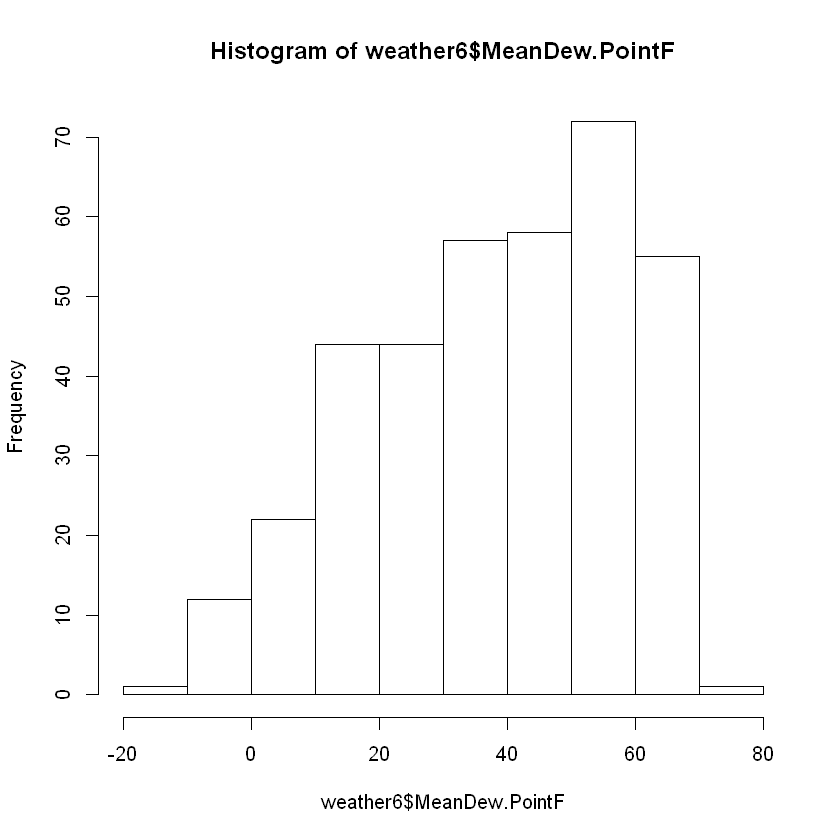

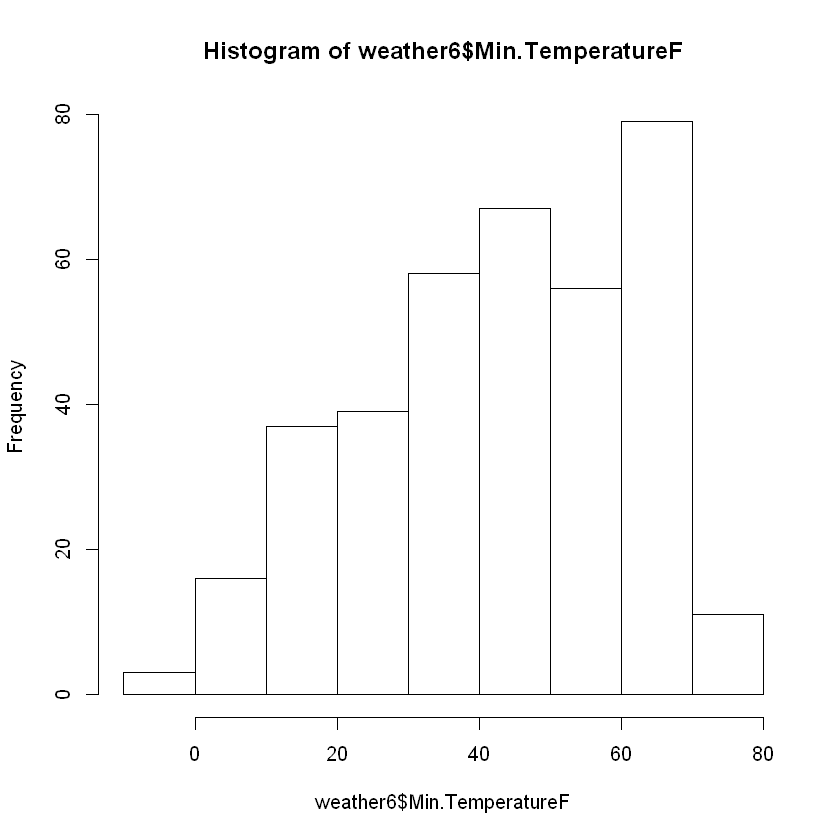

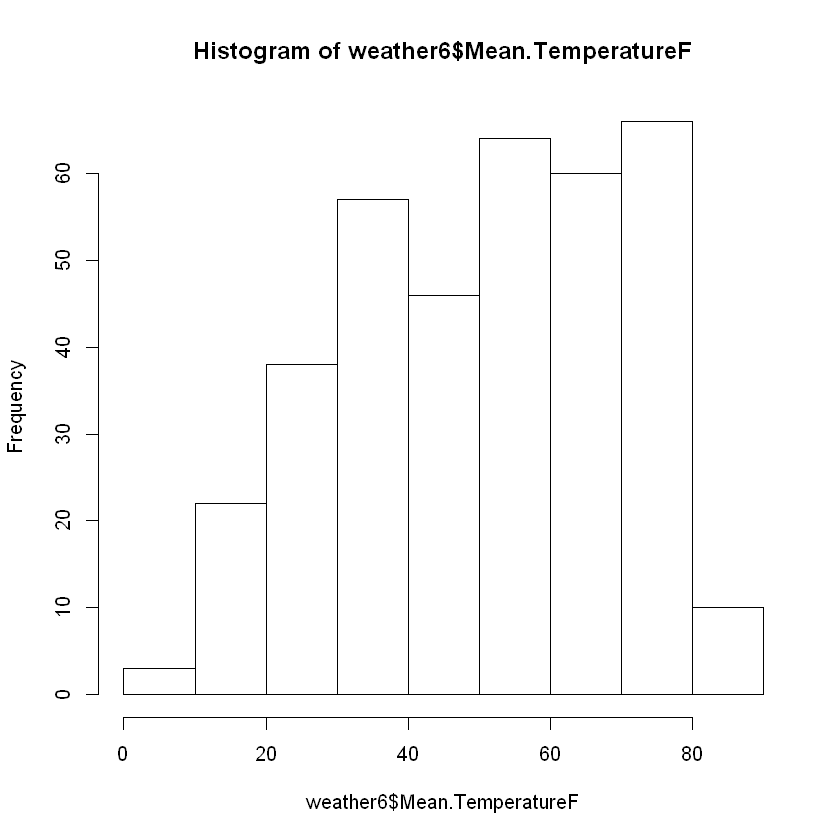

In [18]:
# Review summary of full data once more
summary(weather6)

# Look at histogram for MeanDew.PointF
hist(weather6$MeanDew.PointF)

# Look at histogram for Min.TemperatureF
hist(weather6$Min.TemperatureF)

# Compare to histogram for Mean.TemperatureF
hist(weather6$Mean.TemperatureF)

It looks like you have sufficiently tidied your data!

# Finishing touches

Before officially calling our weather data clean, we want to put a couple of finishing touches on the data. These are a bit more subjective and may not be necessary for analysis, but they will make the data easier for others to interpret, which is generally a good thing.

There are a number of stylistic conventions in the R language. Depending on who you ask, these conventions may vary. Because the period (`.`) has special meaning in certain situations, we will be using underscores (`_`) to separate words in variable names. We also prefer all lowercase letters so that no one has to remember which letters are uppercase or lowercase.

Finally, the `events` column (renamed to be all lowercase in the first instruction) contains an empty string ("") for any day on which there was no significant weather event such as rain, fog, a thunderstorm, etc. However, if it's the first time you're seeing these data, it may not be obvious that this is the case, so it's best for us to be explicit and replace the empty strings with something more meaningful.

In [19]:
new_colnames = c("date", "events", 
                 "cloud_cover", "max_dew_point_f", 
                 "max_gust_speed_mph", "max_humidity", 
                 "max_sea_level_pressure_in", "max_temperature_f",
                 "max_visibility_miles", "max_wind_speed_mph",
                 "mean_humidity", "mean_sea_level_pressure_in",
                 "mean_temperature_f", "mean_visibility_miles",
                 "mean_wind_speed_mph", "mean_dew_point_f", 
                 "min_dew_point_f", "min_humidity", 
                 "min_sea_level_pressure_in", "min_temperature_f",
                 "min_visibility_miles", "precipitation_in","wind_dir_degrees")

In [20]:
# Clean up column names
names(weather6) <- new_colnames

# Replace empty cells in events column
weather6$events[weather6$events == ""] <- "None"
    
# Print the first 6 rows of weather6
head(weather6)

date,events,cloud_cover,max_dew_point_f,max_gust_speed_mph,max_humidity,max_sea_level_pressure_in,max_temperature_f,max_visibility_miles,max_wind_speed_mph,...,mean_visibility_miles,mean_wind_speed_mph,mean_dew_point_f,min_dew_point_f,min_humidity,min_sea_level_pressure_in,min_temperature_f,min_visibility_miles,precipitation_in,wind_dir_degrees
2014-12-01,Rain,6,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-10,Rain,8,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357
2014-12-11,Rain-Snow,8,37,28,92,29.81,39,10,21,...,7,13,31,27,82,29.44,32,1,0.02,230
2014-12-12,Snow,7,28,21,85,29.88,39,10,16,...,10,11,27,25,64,29.81,31,7,0.00,286
2014-12-13,None,5,28,23,75,29.86,42,10,17,...,10,12,26,24,55,29.78,32,10,0.00,298
2014-12-14,None,4,29,20,82,29.91,45,10,15,...,10,10,27,25,53,29.78,33,10,0.00,306


In [21]:
tail(weather6)

,date,events,cloud_cover,max_dew_point_f,max_gust_speed_mph,max_humidity,max_sea_level_pressure_in,max_temperature_f,max_visibility_miles,max_wind_speed_mph,...,mean_visibility_miles,mean_wind_speed_mph,mean_dew_point_f,min_dew_point_f,min_humidity,min_sea_level_pressure_in,min_temperature_f,min_visibility_miles,precipitation_in,wind_dir_degrees
361,2015-11-05,None,4,61,31,100,30.30,76,10,22,...,9,12,55,48,53,30.09,50,5,0.00,224
362,2015-11-06,None,4,62,32,93,30.07,73,10,26,...,10,15,61,54,64,29.71,62,10,0.00,222
363,2015-11-07,None,6,45,33,57,30.02,69,10,25,...,10,13,38,33,39,29.83,50,10,0.00,280
364,2015-11-08,None,0,34,25,65,30.38,56,10,18,...,10,12,30,24,30,30.04,44,10,0.00,283
365,2015-11-09,None,2,36,20,70,30.43,60,10,16,...,10,9,32,30,33,30.32,41,10,0.00,237
366,2015-12-01,Rain,7,43,17,96,30.40,45,10,15,...,8,6,35,25,69,30.01,32,1,0.14,109


In [22]:
str(weather6)

'data.frame':	366 obs. of  23 variables:
 $ date                      : Date, format: "2014-12-01" "2014-12-10" ...
 $ events                    : chr  "Rain" "Rain" "Rain-Snow" "Snow" ...
 $ cloud_cover               : num  6 8 8 7 5 4 2 8 8 7 ...
 $ max_dew_point_f           : num  46 45 37 28 28 29 33 42 46 34 ...
 $ max_gust_speed_mph        : num  29 29 28 21 23 20 21 10 26 30 ...
 $ max_humidity              : num  74 100 92 85 75 82 89 96 100 89 ...
 $ max_sea_level_pressure_in : num  30.4 29.6 29.8 29.9 29.9 ...
 $ max_temperature_f         : num  64 48 39 39 42 45 42 44 49 44 ...
 $ max_visibility_miles      : num  10 10 10 10 10 10 10 10 10 10 ...
 $ max_wind_speed_mph        : num  22 23 21 16 17 15 15 8 20 23 ...
 $ mean_humidity             : num  63 95 87 75 65 68 75 85 85 73 ...
 $ mean_sea_level_pressure_in: num  30.1 29.5 29.6 29.9 29.8 ...
 $ mean_temperature_f        : num  52 43 36 35 37 39 37 40 45 40 ...
 $ mean_visibility_miles     : num  10 3 7 10 10 10 10 9 6 1

In [23]:
glimpse(weather6)

Rows: 366
Columns: 23
$ date                       <date> 2014-12-01, 2014-12-10, 2014-12-11, 201...
$ events                     <chr> "Rain", "Rain", "Rain-Snow", "Snow", "No...
$ cloud_cover                <dbl> 6, 8, 8, 7, 5, 4, 2, 8, 8, 7, 4, 7, 6, 8...
$ max_dew_point_f            <dbl> 46, 45, 37, 28, 28, 29, 33, 42, 46, 34, ...
$ max_gust_speed_mph         <dbl> 29, 29, 28, 21, 23, 20, 21, 10, 26, 30, ...
$ max_humidity               <dbl> 74, 100, 92, 85, 75, 82, 89, 96, 100, 89...
$ max_sea_level_pressure_in  <dbl> 30.45, 29.58, 29.81, 29.88, 29.86, 29.91...
$ max_temperature_f          <dbl> 64, 48, 39, 39, 42, 45, 42, 44, 49, 44, ...
$ max_visibility_miles       <dbl> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...
$ max_wind_speed_mph         <dbl> 22, 23, 21, 16, 17, 15, 15, 8, 20, 23, 1...
$ mean_humidity              <dbl> 63, 95, 87, 75, 65, 68, 75, 85, 85, 73, ...
$ mean_sea_level_pressure_in <dbl> 30.13, 29.50, 29.61, 29.85, 29.82, 29.83...
$ mean_temperature_f         <

In [24]:
summary(weather6)

      date               events           cloud_cover    max_dew_point_f
 Min.   :2014-12-01   Length:366         Min.   :0.000   Min.   :-6.00  
 1st Qu.:2015-03-02   Class :character   1st Qu.:3.000   1st Qu.:32.00  
 Median :2015-06-01   Mode  :character   Median :5.000   Median :47.50  
 Mean   :2015-06-01                      Mean   :4.708   Mean   :45.48  
 3rd Qu.:2015-08-31                      3rd Qu.:7.000   3rd Qu.:61.00  
 Max.   :2015-12-01                      Max.   :8.000   Max.   :75.00  
                                                                        
 max_gust_speed_mph  max_humidity    max_sea_level_pressure_in
 Min.   : 0.00      Min.   : 39.00   Min.   :29.58            
 1st Qu.:21.00      1st Qu.: 73.25   1st Qu.:30.00            
 Median :25.50      Median : 86.00   Median :30.14            
 Mean   :26.99      Mean   : 83.23   Mean   :30.16            
 3rd Qu.:31.25      3rd Qu.: 93.00   3rd Qu.:30.31            
 Max.   :94.00      Max.   :100.00   M